# DATASET INFORMATION

You have to scrape at least 1500 rows of data. You can scrape more data as well, it’s up to you, 
More the data better the model
In this section you have to scrape the data of flights from different websites (yatra.com, 
skyscanner.com, official websites of airlines, etc). The number of columns for data doesn’t have 
limit, it’s up to you and your creativity. Generally, these columns areairline name, date of journey, 
source, destination, route, departure time, arrival time, duration, total stops and the target variable 
price. You can make changes to it, you can add or you can remove some columns, it completely
depends on the website from which you are fetching the data.

In [1]:
#Importing the needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Storing the data into the dataframe & printing it

df=pd.read_csv('FLIGHT-DATA-SCRAPING.csv')
df

,Unnamed: 0,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price
0,0,Go First,12:50,22:05,9h 15m,New Delhi,Mumbai,eCash 250,1 Stop,5954
1,1,Air India,18:00,20:00,2h 00m,New Delhi,Mumbai,Free Meal,Non Stop,5955
2,2,Air India,07:00,09:05,2h 05m,New Delhi,Mumbai,Free Meal,Non Stop,5955
3,3,Vistara,05:45,07:55,2h 10m,New Delhi,Mumbai,No Meal Fare,Non Stop,5955
4,4,IndiGo,06:30,08:40,2h 10m,New Delhi,Mumbai,Emissions: 142 Kg CO2,Non Stop,5955
...,...,...,...,...,...,...,...,...,...,...
3155,3155,Air India,17:30,09:00,15h 30m,Goa,New Delhi,Free Meal,2 Stop(s),20910
3156,3156,Air India,21:00,10:15,13h 15m,Goa,New Delhi,Free Meal,1 Stop,22590
3157,3157,Air India,17:30,13:50,20h 20m,Goa,New Delhi,Free Meal,2 Stop(s),23745
3158,3158,Air India,23:35,10:15,10h 40m,Goa,New Delhi,Free Meal,1 Stop,25162


In [3]:
#Printing the shape of the dataset it stats that there are 3160 rows & 10 columns 

df.shape

(3160, 10)

In [4]:
#Getting the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160 entries, 0 to 3159
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3160 non-null   int64 
 1   Airline            3160 non-null   object
 2   Departure_time     3160 non-null   object
 3   Time_of_arrival    3160 non-null   object
 4   Duration           3160 non-null   object
 5   Source             3160 non-null   object
 6   Destination        3160 non-null   object
 7   Meal_availability  3160 non-null   object
 8   Number_of_stops    3160 non-null   object
 9   Price              3160 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 247.0+ KB


In [5]:
#Checking the null values
#We can see that there are no null valuies in our dataset

df.isnull().sum()

Unnamed: 0           0
Airline              0
Departure_time       0
Time_of_arrival      0
Duration             0
Source               0
Destination          0
Meal_availability    0
Number_of_stops      0
Price                0
dtype: int64

<AxesSubplot:>

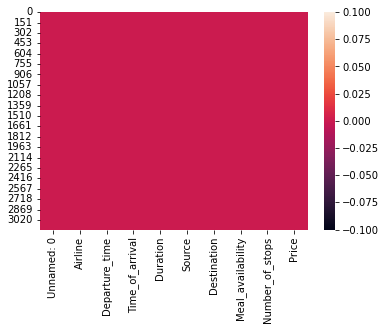

In [6]:
#Plotting the graph with the help of seaborn library
#As the graph is fully orange & there are no lines means our dataset is clean & there are no null values

sns.heatmap(df.isnull())

# DROPPING THE COLUMNS WE DON'T NEED

In [7]:
#Dropping the Unnamed column as it does'nt contribute towards the analysis part

df=df.drop(['Unnamed: 0'],axis=1)

In [9]:
#Printing the dataset

df

,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price
0,Go First,12:50,22:05,9h 15m,New Delhi,Mumbai,eCash 250,1 Stop,5954
1,Air India,18:00,20:00,2h 00m,New Delhi,Mumbai,Free Meal,Non Stop,5955
2,Air India,07:00,09:05,2h 05m,New Delhi,Mumbai,Free Meal,Non Stop,5955
3,Vistara,05:45,07:55,2h 10m,New Delhi,Mumbai,No Meal Fare,Non Stop,5955
4,IndiGo,06:30,08:40,2h 10m,New Delhi,Mumbai,Emissions: 142 Kg CO2,Non Stop,5955
...,...,...,...,...,...,...,...,...,...
3155,Air India,17:30,09:00,15h 30m,Goa,New Delhi,Free Meal,2 Stop(s),20910
3156,Air India,21:00,10:15,13h 15m,Goa,New Delhi,Free Meal,1 Stop,22590
3157,Air India,17:30,13:50,20h 20m,Goa,New Delhi,Free Meal,2 Stop(s),23745
3158,Air India,23:35,10:15,10h 40m,Goa,New Delhi,Free Meal,1 Stop,25162


# ENCODING THE COLUMNS

In [10]:
#Converting the columns with LabelEncoder

from sklearn.preprocessing import LabelEncoder
categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

In [11]:
df

,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price
0,2,111,219,381,5,7,11,0,5954
1,1,171,194,243,5,7,9,4,5955
2,1,45,63,244,5,7,9,4,5955
3,5,30,49,245,5,7,10,4,5955
4,3,39,58,245,5,7,3,4,5955
...,...,...,...,...,...,...,...,...,...
3155,1,165,62,67,2,8,9,1,20910
3156,1,206,77,40,2,8,9,0,22590
3157,1,165,120,137,2,8,9,1,23745
3158,1,233,77,9,2,8,9,0,25162


# STATISTICAL SUMMARY

In [20]:
#Getting the description of the dataset

df.describe()

,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price
count,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000
mean,3.118038,112.156329,138.378481,208.619304,2.689873,4.512975,9.836392,0.818987,14454.162975
std,1.721967,62.518502,67.756120,125.448712,1.889649,2.721275,1.371996,1.439556,6385.523113
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3363.000000
25%,1.000000,53.000000,70.000000,94.000000,1.000000,2.000000,9.000000,0.000000,9850.500000
50%,3.000000,106.000000,150.000000,214.000000,3.000000,5.000000,10.000000,0.000000,13636.500000
75%,5.000000,169.000000,196.000000,339.000000,4.000000,7.000000,11.000000,1.000000,17759.750000
max,5.000000,235.000000,241.000000,389.000000,5.000000,8.000000,11.000000,4.000000,48597.000000


# DATA VISUALIZATION

# UNIVARIET ANALYSIS

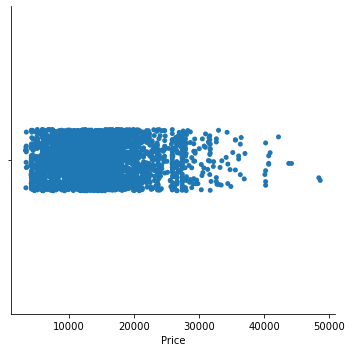

In [12]:
#Plotting catplot with our target column

sns.catplot(data=df,x='Price')

<AxesSubplot:xlabel='Price', ylabel='Density'>

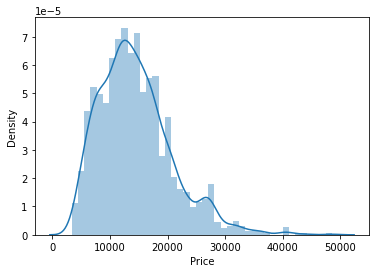

In [13]:
#Plotting the distribution plot of the target variable

sns.distplot(df['Price'])

<AxesSubplot:xlabel='Price'>

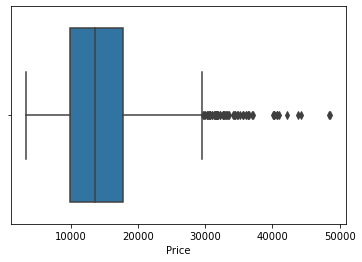

In [14]:
#There are outliers present in the Price column

sns.boxplot(data=df,x='Price')

<AxesSubplot:xlabel='Price'>

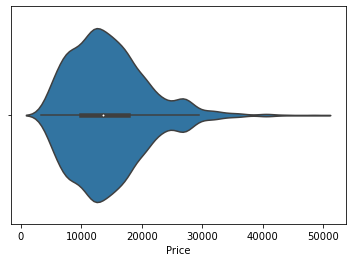

In [15]:
#Plotting violin plot

sns.violinplot(df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Count'>

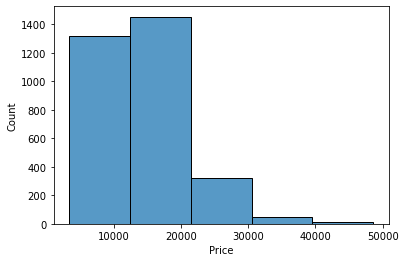

In [16]:
#Plotting histogram

sns.histplot(df['Price'],bins=5)

# BI-VARIERT ANALYSIS

In [21]:
df

,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price
0,2,111,219,381,5,7,11,0,5954
1,1,171,194,243,5,7,9,4,5955
2,1,45,63,244,5,7,9,4,5955
3,5,30,49,245,5,7,10,4,5955
4,3,39,58,245,5,7,3,4,5955
...,...,...,...,...,...,...,...,...,...
3155,1,165,62,67,2,8,9,1,20910
3156,1,206,77,40,2,8,9,0,22590
3157,1,165,120,137,2,8,9,1,23745
3158,1,233,77,9,2,8,9,0,25162


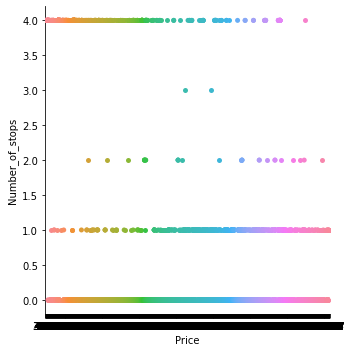

In [22]:
#Plotting catplot

sns.catplot(x='Price',y='Number_of_stops',data=df)

<AxesSubplot:xlabel='Price', ylabel='Number_of_stops'>

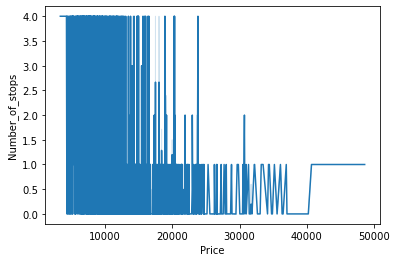

In [23]:
#Ploting line plot 

sns.lineplot(x='Price',y='Number_of_stops',data=df)

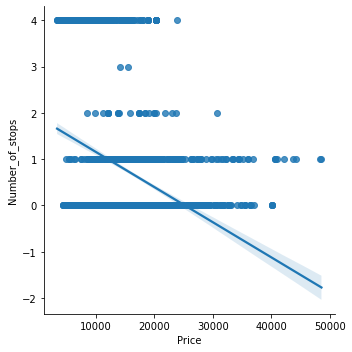

In [24]:
#Ploting lm plot

sns.lmplot('Price','Number_of_stops',data=df)

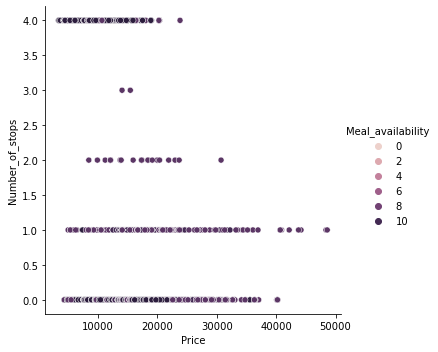

In [26]:
#Plotting the relational plot of Price & Number of stops with respect to the meanl availability in the flights

sns.relplot(x='Price',y='Number_of_stops',hue='Meal_availability',data=df)

<AxesSubplot:xlabel='Price', ylabel='Number_of_stops'>

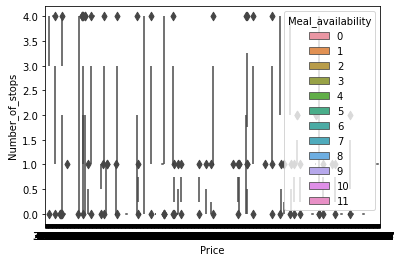

In [27]:
#Plotting the boxen plot of Price & Number of stops with respect to the Meal availability

sns.boxenplot(x='Price',y='Number_of_stops',hue='Meal_availability',data=df)

<AxesSubplot:xlabel='Price', ylabel='Meal_availability'>

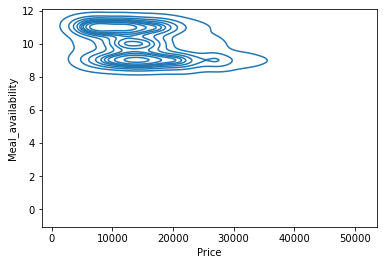

In [28]:
#Ploting kde plot of Price & meal availability

sns.kdeplot(x='Price',y='Meal_availability',data=df)

# MULTIVARIET ANALYSIS

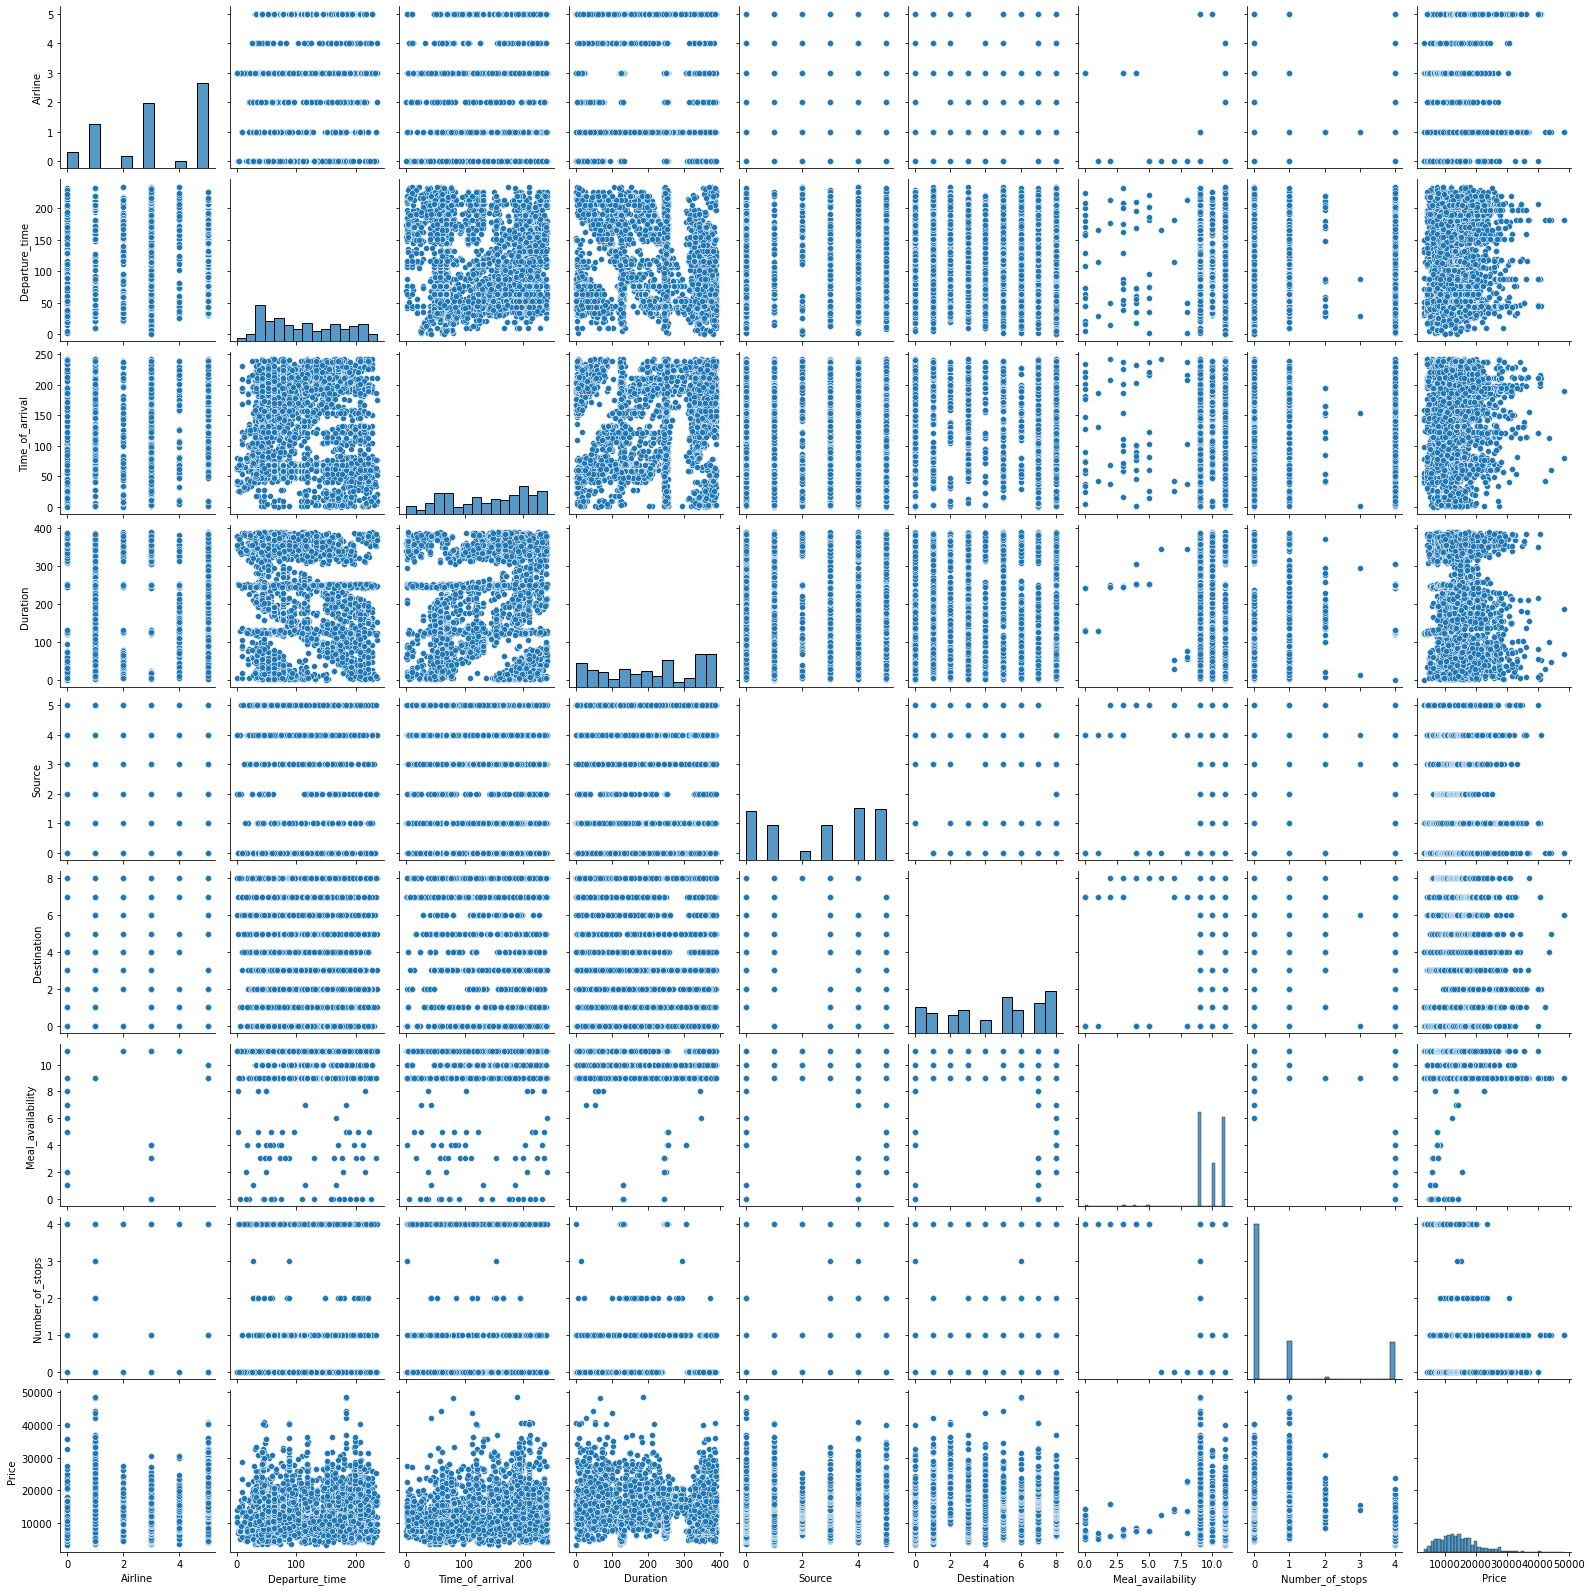

In [29]:
#Plotting the pairplpot of the dataset 
#Printing the all the rows & columns with respect to each other 

sns.pairplot(df)

# CORRELATION

In [17]:
#Printing the corrleation of the dataset

df.corr()

,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price
Airline,1.000000,-0.084072,0.052285,-0.015000,-0.033886,0.012542,0.062979,-0.064934,0.099269
Departure_time,-0.084072,1.000000,0.030722,-0.161982,0.083165,-0.058926,-0.058669,0.042734,0.066828
Time_of_arrival,0.052285,0.030722,1.000000,0.137534,-0.024116,-0.042410,0.039922,-0.047317,0.120792
Duration,-0.015000,-0.161982,0.137534,1.000000,-0.006754,0.031827,0.196774,-0.024049,-0.112139
Source,-0.033886,0.083165,-0.024116,-0.006754,1.000000,-0.293904,0.010093,0.068380,-0.097770
Destination,0.012542,-0.058926,-0.042410,0.031827,-0.293904,1.000000,0.014516,0.008196,-0.104075
Meal_availability,0.062979,-0.058669,0.039922,0.196774,0.010093,0.014516,1.000000,-0.143380,-0.118812
Number_of_stops,-0.064934,0.042734,-0.047317,-0.024049,0.068380,0.008196,-0.143380,1.000000,-0.336506
Price,0.099269,0.066828,0.120792,-0.112139,-0.097770,-0.104075,-0.118812,-0.336506,1.000000


<AxesSubplot:>

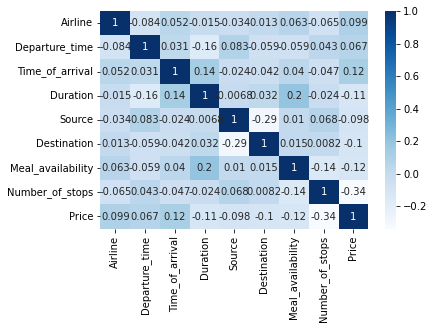

In [18]:
#Showing corelation
#Here the darker shades are highly corelated

sns.heatmap(df.corr(),annot=True,cmap='Blues')

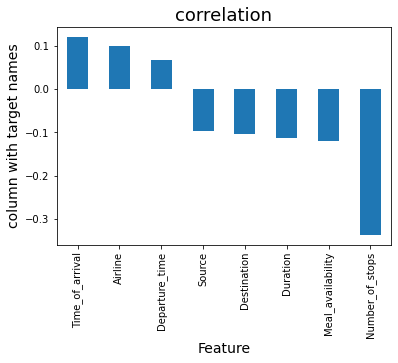

In [19]:
#Showing +vely & -vely corelation of the columns

df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# PLOTTING OUTLIERS

Airline                 AxesSubplot(0.125,0.125;0.0731132x0.755)
Departure_time       AxesSubplot(0.212736,0.125;0.0731132x0.755)
Time_of_arrival      AxesSubplot(0.300472,0.125;0.0731132x0.755)
Duration             AxesSubplot(0.388208,0.125;0.0731132x0.755)
Source               AxesSubplot(0.475943,0.125;0.0731132x0.755)
Destination          AxesSubplot(0.563679,0.125;0.0731132x0.755)
Meal_availability    AxesSubplot(0.651415,0.125;0.0731132x0.755)
Number_of_stops      AxesSubplot(0.739151,0.125;0.0731132x0.755)
Price                AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

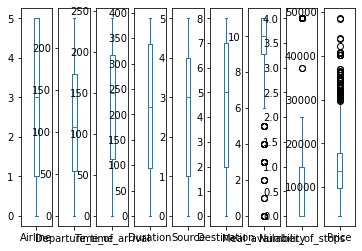

In [30]:
#Showing boxplots of all the variables to determine outliers

df.plot(kind='box',subplots=True)

# PLOTTING SKEWNESS

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

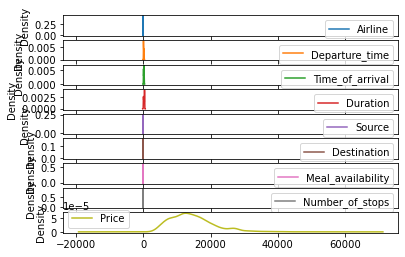

In [31]:
#Determining the skewness present in all the columns

df.plot(kind='kde',subplots=True)

# INTER-QUARTILE-RANGE

In [32]:
#Determining  25 % & stored in the Q1 for determining IQR

Q1=df.quantile(0.25)

In [33]:
#Determining  75 % & stored in the Q1 for determining IQR

Q3=df.quantile(0.75)

In [34]:
#Printing inter-quartile-range

IQR=Q3-Q1
IQR

Airline                 4.00
Departure_time        116.00
Time_of_arrival       126.00
Duration              245.00
Source                  3.00
Destination             5.00
Meal_availability       2.00
Number_of_stops         1.00
Price                7909.25
dtype: float64

# REMOVING OUTLIERS

In [36]:
#Removing outliers

from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   4,    5,   11,   14,   20,   24,   41,   98,  148,  149,  150,
         154,  155,  156,  157,  164,  165,  269,  541,  650,  675,  707,
         708,  717,  724,  725,  742,  743,  799,  840,  844,  851,  852,
         853,  859,  861,  864,  928,  929, 1042, 1178, 1179, 1180, 1181,
        1182, 1414, 1418, 1420, 1423, 1424, 1429, 1430, 1432, 1433, 1435,
        1535, 1539, 1544, 1548, 1552, 1578, 1579, 1585, 1603, 1612, 1613,
        1627, 1701, 1702, 1778, 1779, 1825, 1938, 1998, 2083, 2084, 2267,
        2268, 2269, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395],
       dtype=int64),
 array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8,
        8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       dtype=int64))

In [37]:
#Storing the dataframe after removing outlier

df_new=df[(z<3).all(axis=1)]
df_new

,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price
0,2,111,219,381,5,7,11,0,5954
1,1,171,194,243,5,7,9,4,5955
2,1,45,63,244,5,7,9,4,5955
3,5,30,49,245,5,7,10,4,5955
6,1,57,76,245,5,7,9,4,5955
...,...,...,...,...,...,...,...,...,...
3155,1,165,62,67,2,8,9,1,20910
3156,1,206,77,40,2,8,9,0,22590
3157,1,165,120,137,2,8,9,1,23745
3158,1,233,77,9,2,8,9,0,25162


In [38]:
#Printing the old dataframe 

df

,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price
0,2,111,219,381,5,7,11,0,5954
1,1,171,194,243,5,7,9,4,5955
2,1,45,63,244,5,7,9,4,5955
3,5,30,49,245,5,7,10,4,5955
4,3,39,58,245,5,7,3,4,5955
...,...,...,...,...,...,...,...,...,...
3155,1,165,62,67,2,8,9,1,20910
3156,1,206,77,40,2,8,9,0,22590
3157,1,165,120,137,2,8,9,1,23745
3158,1,233,77,9,2,8,9,0,25162


# % OF DATA LOSS

In [39]:
#Data loss
#Total 2.75 % of the data is lost after removing outliers

loss_percentage=(3160-3073)/3160*100
print(loss_percentage)

2.7531645569620253


# DIVIDING X & Y

In [40]:
#Dividing the data & printing the shape of it

x=df_new.drop('Price', axis=1)
y=df_new['Price']
print(x.shape)
print(y.shape)

(3073, 8)
(3073,)


# CHECKING & REMOVING SKEWNESS

In [41]:
#There are little skewness present in the columns we try to mininmize it to the extent that we can

df_new.skew()

Airline             -0.327014
Departure_time       0.276062
Time_of_arrival     -0.253424
Duration            -0.137519
Source              -0.249314
Destination         -0.280782
Meal_availability   -0.017982
Number_of_stops      1.714754
Price                0.644819
dtype: float64

In [42]:
#Removnig skewness with the help of power transformation

from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [43]:
#Here we can see skewness has been removed from the data

df_new.skew()

Airline             -0.278453
Departure_time      -0.110872
Time_of_arrival     -0.321332
Duration            -0.379470
Source              -0.310849
Destination         -0.313039
Meal_availability   -0.031782
Number_of_stops      0.833876
dtype: float64

# MODELS

In [44]:
#Importing the needed models for prediction

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [49]:
#Using for loop determining the best accuracy for the model at the best random state

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10,random_state=i)
    DTC=DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred=DTC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, " on Random State ",maxRS)

Best accuracy is  0.4253246753246753  on Random State  145


In [50]:
#Sending the data for training & testing phase

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [51]:
#Created a list in which we have stored all the instances of the model
#Using for loop we will determine the accuracy of all the models

model=[DecisionTreeClassifier(),SVC(),AdaBoostClassifier(),RandomForestClassifier(),LogisticRegression()]

for m in model:
    m.fit(x_train,y_train)
    #m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy Score of',m,'is:', acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('\n')

Accuracy Score of DecisionTreeClassifier() is: 0.36097560975609755
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        3363       0.00      0.00      0.00         1
        3497       0.00      0.00      0.00         1
        3498       0.50      1.00      0.67         1
        3499       0.00      0.00      0.00         0
        4202       0.00      0.00      0.00         1
        4263       1.00      0.50      0.67         2
        4275       1.00      1.00      1.00         2
        4338       0.00      0.00      0.00         1
        4339       0.00      0.00      0.00         1
        4453       0.67      1.00      0.80         2
        4548       0.00      0.00      0.00         0
        4585       0.00      0.00      0.00         1
        4820       1.00      1.00      1.00         1
        4836       0.00      0.00      0.00         0
  

Accuracy Score of SVC() is: 0.014634146341463415
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        3363       0.00      0.00      0.00         1
        3497       0.00      0.00      0.00         1
        3498       0.00      0.00      0.00         1
        4202       0.00      0.00      0.00         1
        4263       0.00      0.00      0.00         2
        4275       0.00      0.00      0.00         2
        4338       0.00      0.00      0.00         1
        4339       0.00      0.00      0.00         1
        4453       0.04      0.50      0.08         2
        4585       0.00      0.00      0.00         1
        4820       0.00      0.00      0.00         1
        4969       0.00      0.00      0.00         1
        5100       0.00      0.00      0.00         1
        5103       0.00      0.00      0.00         1
        5177       0

Accuracy Score of AdaBoostClassifier() is: 0.004878048780487805
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        3363       0.00      0.00      0.00         1
        3497       0.00      0.00      0.00         1
        3498       0.00      0.00      0.00         1
        4202       0.00      0.00      0.00         1
        4263       0.00      0.00      0.00         2
        4275       0.00      0.00      0.00         2
        4338       0.00      0.00      0.00         1
        4339       0.00      0.00      0.00         1
        4453       0.00      0.00      0.00         2
        4585       0.00      0.00      0.00         1
        4820       0.00      0.00      0.00         1
        4969       0.00      0.00      0.00         1
        5100       0.00      0.00      0.00         1
        5103       0.00      0.00      0.00         1
     

Accuracy Score of RandomForestClassifier() is: 0.36585365853658536
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        3363       0.00      0.00      0.00         1
        3497       0.00      0.00      0.00         1
        3498       0.33      1.00      0.50         1
        4202       0.00      0.00      0.00         1
        4263       1.00      0.50      0.67         2
        4275       1.00      1.00      1.00         2
        4338       0.00      0.00      0.00         1
        4339       0.00      0.00      0.00         1
        4453       0.50      0.50      0.50         2
        4454       0.00      0.00      0.00         0
        4548       0.00      0.00      0.00         0
        4585       0.00      0.00      0.00         1
        4820       0.00      0.00      0.00         1
        4836       0.00      0.00      0.00         0
  

Accuracy Score of LogisticRegression() is: 0.03739837398373984
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        3363       0.00      0.00      0.00         1
        3497       0.00      0.00      0.00         1
        3498       0.00      0.00      0.00         1
        4202       0.00      0.00      0.00         1
        4263       0.00      0.00      0.00         2
        4275       0.00      0.00      0.00         2
        4338       0.00      0.00      0.00         1
        4339       0.00      0.00      0.00         1
        4453       0.20      1.00      0.33         2
        4585       0.00      0.00      0.00         1
        4820       0.00      0.00      0.00         1
        4969       0.00      0.00      0.00         1
        5100       0.00      0.00      0.00         1
        5103       0.00      0.00      0.00         1
      

MODELS     ACCURACY

DTC         36.09
SVC         01.46
ABC         00.48
RFC         36.58
LOR         03.73

# FROM THE ABOVE GRAPH WE CAN DETERMINE THAT THE RFC MODEL IS BEST BUT BEFORE SELECTION WE WILL CROSS VALIDATE THE MODEL

In [52]:
#Again using for loop we will now determine the cross validation of each model

model=[DecisionTreeClassifier(),SVC(),AdaBoostClassifier(),RandomForestClassifier(),LogisticRegression()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for ",m," is : ",score.mean())

Score for  DecisionTreeClassifier()  is :  0.3312708879531792
Score for  SVC()  is :  0.01464156139932735
Score for  AdaBoostClassifier()  is :  0.007810704165673579
Score for  RandomForestClassifier()  is :  0.35827970657556735
Score for  LogisticRegression()  is :  0.02733508116840126


THE LEAST DIFFERENCE THAT WE CAN SEE IS IN RFC MODEL SO WE WILL SELECT RFC MODEL AS OUR BEST & NOW WILL HYPERPARAMETER TUNNING

# HYPER PARAMETER TUNNING

In [53]:
#Importing the grid search cv for hypertune the model

from sklearn.model_selection import GridSearchCV

In [54]:
#Passing the parameters for the model

parameters = {'max_depth':np.arange(2,10),
             'criterion':['gini','entropy'],
             'max_features':['auto','sqrt','log2'],
             'min_samples_split':[2,3,4]}

In [55]:
#Creating the instance of the model 

GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [56]:
#Fetting the model

GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4]})

In [57]:
#Getting the best parameters

GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_split': 3}

In [58]:
#Passing the best parameters & printing the final accuracy

Final_mod= RandomForestClassifier(criterion="entropy",max_depth=9,max_features="log2",min_samples_split=3)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

34.959349593495936


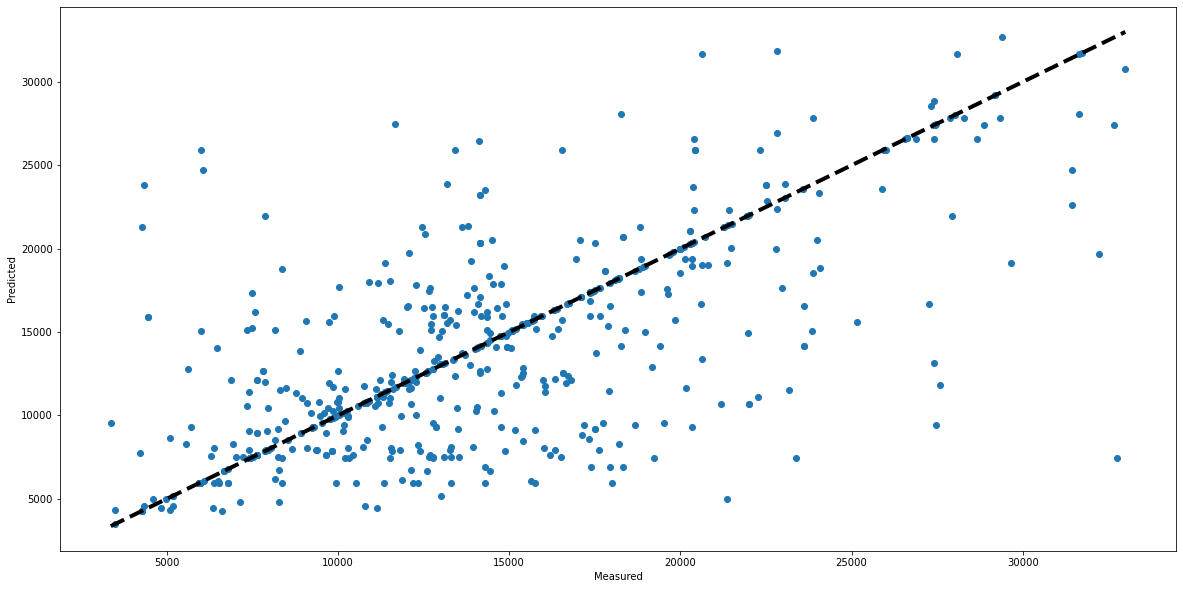

In [59]:
#Ploting a diagram of the predicted & measured results

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax.scatter(y_test, pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# SAVING THE MODEL

In [60]:
#Importing pickle for saving the model
#Saving it in the pickle file

import pickle
filename= 'FLIGHT-PRICE-FOR-FLIPROBO.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))

# CONCLUSION

In [61]:
#load the model from the disk

loaded_model = pickle.load(open('FLIGHT-PRICE-FOR-FLIPROBO.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.34959349593495936


In [62]:
#Printing the dataframe of the predicted & measured 

conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Orginal"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,605,606,607,608,609,610,611,612,613,614
Predicted,9277,21948,16677,17905,16571,5955,12213,26568,20694,7518,...,5943,22618,16657,13499,11973,19961,12544,7424,5943,21285
Orginal,9277,21948,16677,17905,16571,5955,12213,26568,20694,7518,...,5943,22618,16657,13499,11973,19961,12544,7424,5943,21285


In [63]:
#END